## Content

1. Loading and Visualizing data
2. Constructing the model
    * 2.1. Hypothesis function
    * 2.2. Cost function
    * 2.3. Taking the derivative
3. Implementation/Training the model
4. Plotting the result/Decision boundary
5. Predicting on new data
6. Adding polynomial features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Loading and Visualizing data

In [2]:
# The data is from Coursera Machine Learning course/week3/ex2data1.txt
data = np.loadtxt('../data/data3.txt', delimiter = ',')

m = data.shape[0]      # Number of examples
n = data.shape[1] - 1  # Number of features
 
X = data[:, 0:n]  # Score of first and second exam
Y = data[:, n, np.newaxis]    # Pass or Fail

In [3]:
# Perform Feature Normalization using Standardization
# x = (x - μ) / σ
mu = np.mean(X, axis = 0)
sd = np.std(X, axis = 0)
X = (X - mu) / sd

# Add bias term
X = np.column_stack((np.ones((m, 1)), X))

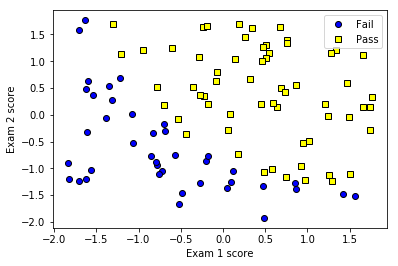

In [4]:
figureId = 1

# @param X: first column is bias term
def plotData(X, Y):
    global figureId
    plt.figure(figureId)
    # plt.grid()
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    neg = np.where(Y == 0)[0]  # index of fail examples
    pos = np.where(Y == 1)[0]  # index of pass examples
    plt.plot(X[neg, 1], X[neg, 2], 'o', color = 'blue', mec = 'black', label = 'Fail')
    plt.plot(X[pos, 1], X[pos, 2], 's', color = 'yellow', mec = 'black', label = 'Pass')
    plt.legend(loc = 'upper right')
    plt.draw()
    
    figureId += 1
    
plotData(X, Y)
plt.show()

## 2. Constructing the model

### 2.1. Hypothesis function

We start with Linear Regression model (hypothesis function is a linear function):

$$h_{\theta}(x) = \theta^{T}x$$

Our data consists of 2 labels which are 0 and 1, which means we need to limit $0 \leq h_{\theta}(x) \leq 1$.

There are many functions help us do that (which is take a real input and output a value between 0 and 1), we will use Sigmoid function:

$$g(x) = \frac{1}{1 + e^{-x}}$$

Our final hypothesis function (which is also the hypothesis function of our Logistic Regression model):

$$h_{\theta}(x) = g(\theta^{T}x) = \frac{1}{1 + e^{-\theta^{T}x}}$$

This is a classification problem, but because of historical reason, we still use the term Logistic _Regression_ (_Regression_ implies problems whose output values are continuous). The term Logistic is used because sigmoid function is a type of logistic function.

We can think $h_{\theta}(x)$ of the estimated probablity that $y = 1$ on input x:
$$ h_{\theta}(x) = P(y = 1 \mid x, \theta)$$

Obviously we must have a threshold to say to which class x will belong, 0.5 is a common one:
* $ y = 1$ if $h_{\theta}(x) \gt 0.5$
* $ y = 0$ if $h_{\theta}(x) \lt 0.5$
* If $h_{\theta}(x) = 0.5$, you can conlude that x neither belongs to class 0 nor 1, OR belongs to one of them (up to you).

### 2.2. Cost function

To design Cost function, we firstly have to design Loss function.

Let's say we are observing a training data $i$ whose label is $ y^{(i)} = 1$, we define our loss function as $ L(\hat{y}^{(i)}, y^{(i)}) = L(h_{\theta}(x^{(i)}), y^{(i)})$. There are two cases (corresponding to two properties we want our loss function to have):
* We predict the label correctly: which means $ h_{\theta}(x^{(i)})$ is close to $1$, we will set the output value (the error) of Loss function small (maybe approach to $0$).
* We predict the label incorrectly: which means $ h_{\theta}(x^{(i)})$ is close to $0$, we want to penalize this heavily by letting Loss function output a big value (and maybe approach to `infinity`).

Maybe you are thinking of a function like this:

<img src="https://i.imgur.com/UVR35XQ.png"/>

One of the functions that satisfies these properties is $y = -log(x)$ 

So if $ y^{(i)} = 1$, loss function is $ L(h_{\theta}(x^{(i)}, y^{(i)}) = -log(h_{\theta}(x^{(i)})$. Similarly you can figure our yourself, if $ y^{(i)} = 0$, loss function is $ L(h_{\theta}(x^{(i)}, y^{(i)}) = -log(1 - h_{\theta}(x^{(i)})$

We can combine those 2 functions into 1:

$$ L(h_{\theta}(x^{(i)}, y^{(i)}) = -y^{(i)}log(h_{\theta}(x^{(i)}) -(1 - y^{(i)})log(1 - h_{\theta}(x^{(i)})$$

That is our Loss function (again, on a single training data), we can easily obtain Cost function by averaging Loss function on the whole training data set:

$$ J(\theta) = \frac{1}{m}\sum_{i = 1}^{m}-y^{(i)}log(h_{\theta}(x^{(i)}) -(1 - y^{(i)})log(1 - h_{\theta}(x^{(i)})$$

### 2.3. Taking the derivative

In order to minimize cost function $J(\theta)$, we need to compute the derivatives of the variable $\theta$ (I will leave the proof to you as an exercise):

$$\frac{dJ}{d\theta_{j}} = \frac{1}{m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

As you may notice, this derivative formular is exactly the same with Linear Regression's.

## 3. Implementation/Training the model

In [5]:
alpha = 0.0025  # Learning rate 
w_init = np.zeros((n + 1, 1))  # Theta (weights)

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def logistic_gradient_descent(X, Y, w_init, alpha, max_iter = 200):
    w = w_init
    iter = 0
    while iter < max_iter:
        error = sigmoid(X.dot(w)) - Y
        w = w - alpha * (1 / m) * X.T.dot(error)
        
        iter += 1
    
    return w

w = logistic_gradient_descent(X, Y, w_init, alpha)

In [6]:
print(w.ravel())

[ 0.04702558  0.13241514  0.11821383]


## 4. Plotting the result/Decision boundary

Looking at the data visualization: if we're doing correctly, there will be a line (or a curve) separate our data into 2 halves, corresponding to 2 classes (0 and 1).

This line (or curve) is called **Decision boundary**, how do we gonna plot it? We will plot the set of points X which lie on the straight line (or curve) , which are not classified.

The point X are not classified when $h_{\theta}(X) = 0.5$, equivalent to $\theta^{T}X = 0$

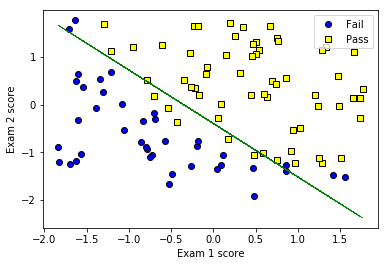

In [7]:
#     w[0]x[0] + w[1]x[1] + w[2]x[2] = 0
# <=> x[2] = (-w[1]x[1] - w[0]) / w[2] (bias term x[0] = 1)

plotData(X, Y)

plt.plot(X[:, 1], (-w[1] * X[:, 1] - w[0]) / w[2], 
        color = 'green',
        linewidth = '0.5')
plt.show()


## 5. Predicting on new data

In [8]:
def predict(X, w):
    X = np.column_stack((np.ones((X.shape[0], 1)), X))  # Bias term
    return sigmoid(X.dot(w))
    
scores = np.array([[30.4, 42.3]])    
scores = (scores - mu) / sd  # Need to normalize before predicting
print('Predicting the label for: ', scores[0::])
if predict(scores, w) >= 0.5:
    print('Pass')
else:
    print('Fail')


Predicting the label for:  [[-1.82040413 -1.29380581]]
Fail


## 6. Adding polynomial features

Looking at the current decision boundary, maybe we can classify 2 classes better if it's a curve (this may cause overfitting but we will talk about it later, I'm just doing this for understanding purpose).

In each training example, we have $x_{1}$, $x_{2}$ as the score of 2 tests. In order to obtain a more complex decision boundary, we can produce polynomial features from two original features such as $x_{1}x_{2}$, $x_{1}^{2}x_{2}$, $x_{1}x_{2}^{2}$ etc. 

For the decision boundary to be drawable, I'm gonna add $x_{1}^{2}$ and $x_{1}^{3}$:

In [9]:
X1 = data[:, 0, np.newaxis]
X2 = data[:, 1, np.newaxis]
Xp = np.column_stack((X1, X2, X1 ** 2, X1 ** 3))

# Feature Scaling
mu = np.mean(Xp, axis = 0)
sd = np.std(Xp, axis = 0)
Xp = (Xp - mu) / sd

# Bias term
Xp = np.column_stack((np.ones((m, 1)), Xp))

In [10]:
alpha = 0.0025
w_init = np.zeros((Xp.shape[1], 1))

w = logistic_gradient_descent(Xp, Y, w_init, alpha, max_iter = 1500)
w = w.ravel()
print(w)

[ 0.26969444  0.45642391  0.66774891  0.39451774  0.33234502]


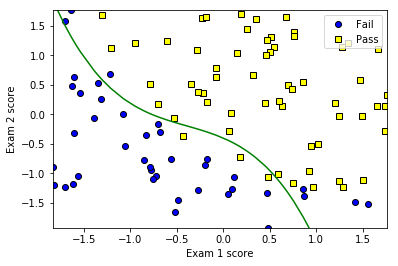

In [11]:
# Plot the training examples
plotData(X, Y)

# Calculate points which lie on the decision boundary
#     w0x0 + w1x1 + w2x2 + w3x1^2 + w4x1^3 = 0
# <=> x2 = (-w0 - w1x1 - w3x1^2 - w4x1^3) / w2
X1_db = Xp[:, 1]
np.ndarray.sort(X1_db)
X2_db = (-w[0] - w[1]*X1_db - w[3]*(X1_db**2) - w[4]*(X1_db**3)) / w[2]

# Limit the range of Ox and Oy (because some points may overshoot the current view)
plt.xlim(np.min(Xp[:, 1]), np.max(Xp[:, 1]))
plt.ylim(np.min(Xp[:, 2]), np.max(Xp[:, 2]))

# Plot the decision boundary
plt.plot(X1_db, X2_db, 
        color = 'green')
plt.show()

Actually it's not better than the straight line decision boundary but you get the idea.